# Air Quality and Weather Data Analysis

This notebook performs **initial exploratory data analysis** on three provided datasets:
- Pollen data (`EPHT_Pollen_Data.csv`)
- Air pollutant and AQI data (`boston_pollutants_with_aqi.csv`)
- Weather data (`boston-weather-data(open_meteo).csv`)

We'll focus on:
- Visualizing data distributions (histograms)
- Identifying missing data patterns (heat maps)


In [76]:
# make a venv and pip install all dependencies first
# commands:
# python -m venv venv
# venv\Scripts\activate
# pip install pandas matplotlib seaborn missingno numpy ipython scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from IPython.display import HTML, display
from scipy import stats

# Set up plotting style for better aesthetics
sns.set_theme(style="whitegrid")

In [77]:
data_path = 'data/'
POLLEN_FILE = data_path + 'EPHT_Pollen_Data.csv'
POLLUTANTS_FILE = data_path + 'boston_pollutants_with_aqi.csv'
WEATHER_FILE = data_path + 'boston-weather-data(open_meteo).csv'

In [78]:
try:
    df_pollen = pd.read_csv(POLLEN_FILE)
    df_pollutants = pd.read_csv(POLLUTANTS_FILE)
    df_weather = pd.read_csv(WEATHER_FILE, header=2)  # skip first 2 metadata rows

    print(f"Loaded {POLLEN_FILE}: {df_pollen.shape}")
    print(f"Loaded {POLLUTANTS_FILE}: {df_pollutants.shape}")
    print(f"Loaded {WEATHER_FILE}: {df_weather.shape}")

except FileNotFoundError as e:
    print(f"Error loading file: {e}. Please ensure all CSV files are correctly uploaded.")
except Exception as e:
    print(f"Unexpected error during loading: {e}")

Loaded data/EPHT_Pollen_Data.csv: (2176, 15)
Loaded data/boston_pollutants_with_aqi.csv: (5478, 14)
Loaded data/boston-weather-data(open_meteo).csv: (9132, 7)


In [79]:
df_pollutants['date'] = pd.to_datetime(df_pollutants['date'])
df_weather.rename(columns={'time': 'date'}, inplace=True)
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_pollen['Date'] = pd.to_datetime(df_pollen['Date'])

print("Date columns standardized and converted to datetime format.")

Date columns standardized and converted to datetime format.


## Missing Data Analysis: Pollutants Dataset
White lines indicate missing data points.  
The heatmap shows **nullity correlations** (values near 1 mean columns tend to be missing together).


In [80]:
def visualize_missingness(df, name, color=(0.3, 0.5, 0.7)):
    """
    Generate missing data visualizations and summaries.
    - Displays a summary of missing counts per column.
    - Shows a missing data matrix (white = missing).
    - If missingness exists, shows a nullity correlation heatmap.
    """

    # Matrix visualization (white = missing)
    msno.matrix(df, color=color, sparkline=False, figsize=(5, 4), fontsize=8, )
    plt.title(f'Missing Data Matrix: {name}', pad=10)
    plt.tight_layout()
    display(HTML("<div style='margin-top:40px;'></div>"))
    plt.show()

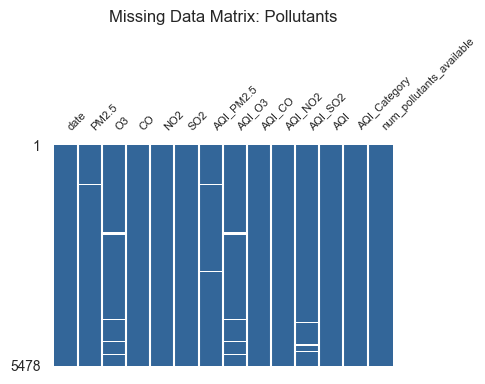

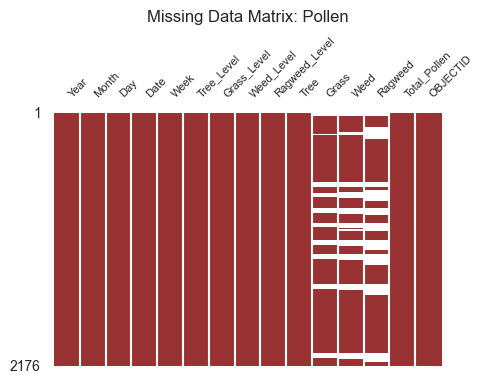

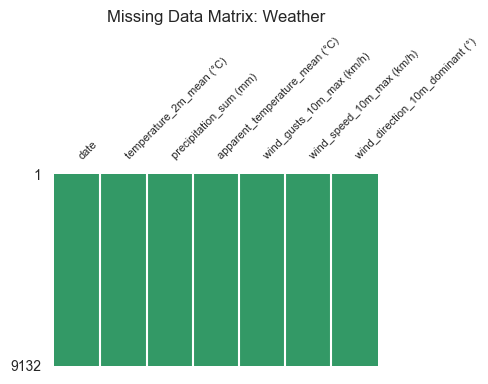

In [81]:
visualize_missingness(df_pollutants, "Pollutants", color=(0.2, 0.4, 0.6))
visualize_missingness(df_pollen, "Pollen", color=(0.6, 0.2, 0.2))
visualize_missingness(df_weather, "Weather", color=(0.2, 0.6, 0.4))

# Data Distribution Analysis

These histograms show how the numerical variables are distributed.
We add **mean (red dashed)** and **median (green solid)** lines for reference.

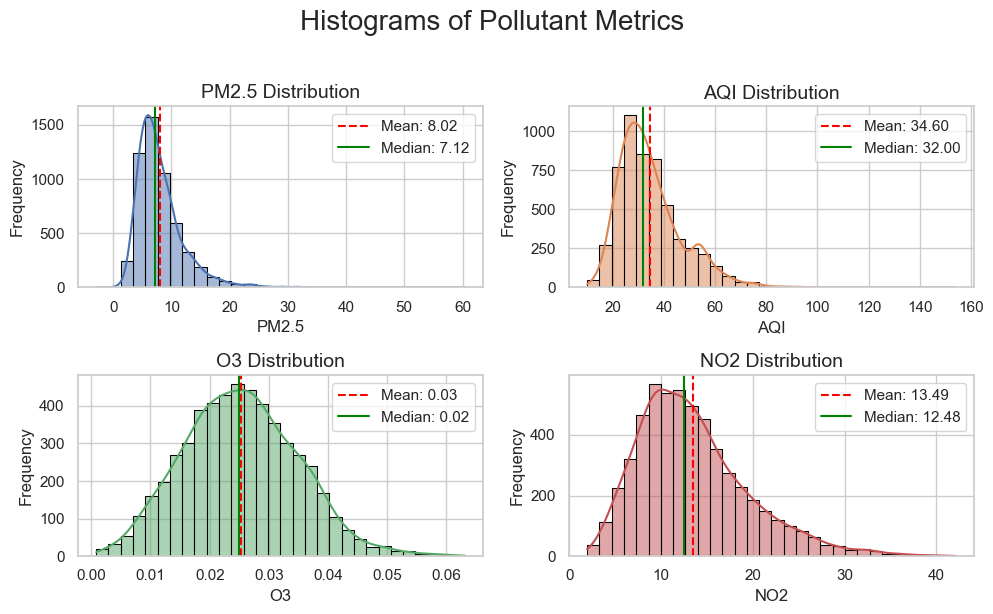

In [82]:
pollutant_cols = ['PM2.5', 'AQI', 'O3', 'NO2']

plt.figure(figsize=(10, 6))
for i, col in enumerate(pollutant_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_pollutants[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("deep")[i], edgecolor='black')

    mean_val = df_pollutants[col].mean()
    median_val = df_pollutants[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Pollutant Metrics', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

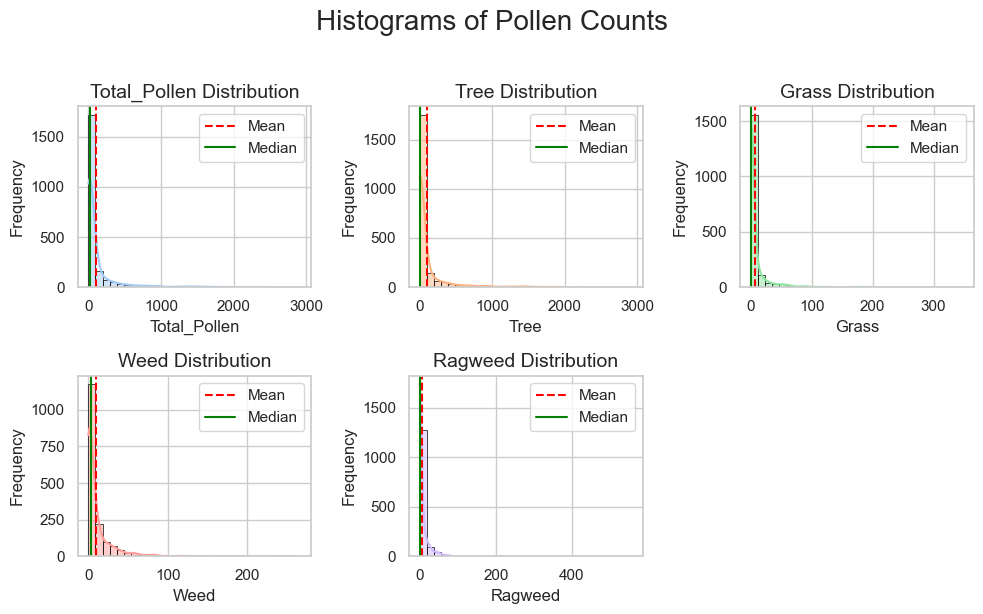

In [83]:
pollen_cols = ['Total_Pollen', 'Tree', 'Grass', 'Weed', 'Ragweed']

plt.figure(figsize=(10, 6))
for i, col in enumerate(pollen_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_pollen[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("pastel")[i], edgecolor='black')

    mean_val = df_pollen[col].mean()
    median_val = df_pollen[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label='Mean')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label='Median')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Pollen Counts', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

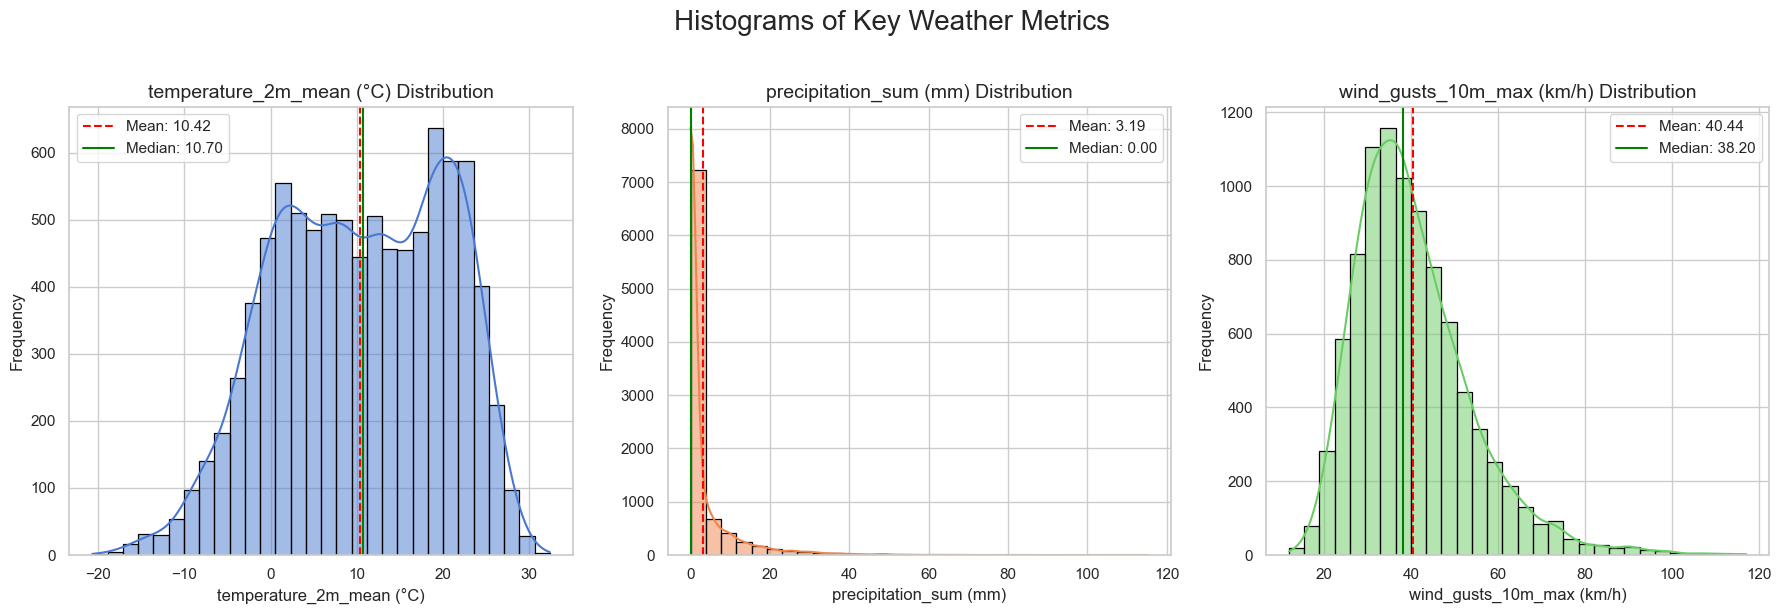

In [84]:
weather_cols = [
    'temperature_2m_mean (°C)',
    'precipitation_sum (mm)',
    'wind_gusts_10m_max (km/h)'
]

plt.figure(figsize=(18, 6))
for i, col in enumerate(weather_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_weather[col].dropna(), kde=True, bins=30,
                 color=sns.color_palette("muted")[i], edgecolor='black')

    mean_val = df_weather[col].mean()
    median_val = df_weather[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_val:.2f}')

    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Histograms of Key Weather Metrics', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# Section 4: Linear Regression Analysis — AQI, Pollen, and Weather

In this section, we explore the linear relationships between:
- **Air Quality Index (AQI)** and key weather metrics  
- **Total Pollen** and key weather metrics  
- **AQI and Pollen variables**
- **Weather variables and Pollen variables**

We use Seaborn’s `regplot` to visualize trends and fit linear regression lines.  
Each scatter plot includes a red regression line representing the best linear fit.

In [85]:
# 4. Linear Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

print("LINEAR REGRESSION ANALYSIS")

# 4.1 Data Preparation: Merge datasets on date
# Merge pollutants and weather on date
df_pollutants_weather = pd.merge(
    df_pollutants, 
    df_weather, 
    on='date', 
    how='inner'
)

# Merge with pollen data
df_pollen_renamed = df_pollen.rename(columns={'Date': 'date'})
df_combined = pd.merge(
    df_pollutants_weather,
    df_pollen_renamed,
    on='date',
    how='inner'
)

print(f"\nCombined dataset shape: {df_combined.shape}")
print(f"Date range: {df_combined['date'].min()} to {df_combined['date'].max()}")

LINEAR REGRESSION ANALYSIS

Combined dataset shape: (2066, 34)
Date range: 2009-04-01 00:00:00 to 2023-10-12 00:00:00


TOTAL POLLEN OVER TIME

Pollen dataset shape: (2176, 2)
Date range: 2009-04-01 00:00:00 to 2024-10-13 00:00:00


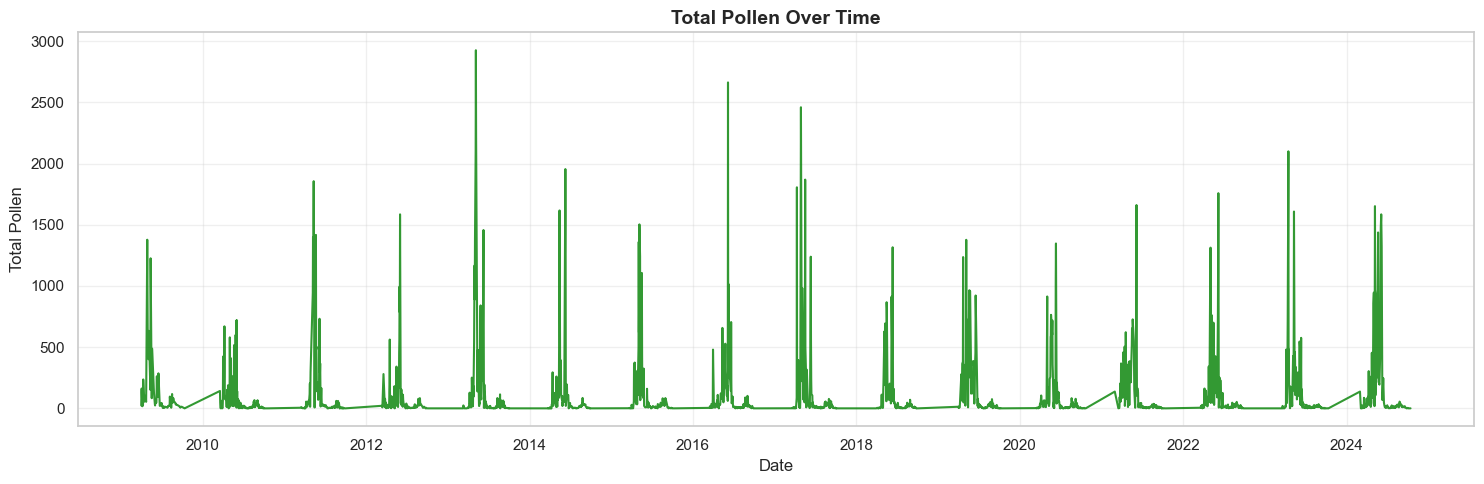


Total Pollen Statistics:
count    2176.000000
mean      111.356310
std       274.741708
min         0.000000
25%         4.000000
50%        17.000000
75%        71.000000
max      2926.000000
Name: Total_Pollen, dtype: float64

 Total Pollen analysis complete!


In [86]:
# Total Pollen Over Time

print("TOTAL POLLEN OVER TIME")

df_pollen_time = df_pollen_renamed[['date', 'Total_Pollen']].dropna().sort_values('date')

print(f"\nPollen dataset shape: {df_pollen_time.shape}")
print(f"Date range: {df_pollen_time['date'].min()} to {df_pollen_time['date'].max()}")

plt.figure(figsize=(15, 5))
plt.plot(df_pollen_time['date'], df_pollen_time['Total_Pollen'], 
         color='green', linewidth=1.5, alpha=0.8)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Pollen', fontsize=12)
plt.title('Total Pollen Over Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTotal Pollen Statistics:")
print(df_pollen_time['Total_Pollen'].describe())

print("\n Total Pollen analysis complete!")

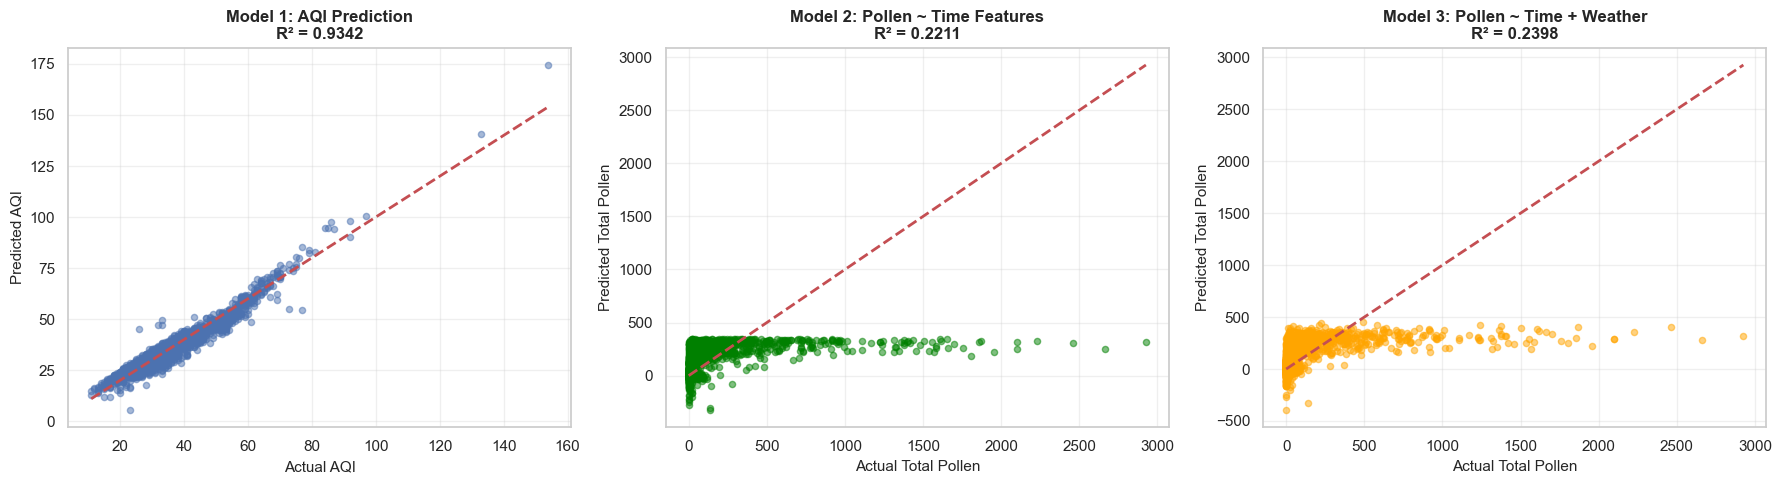

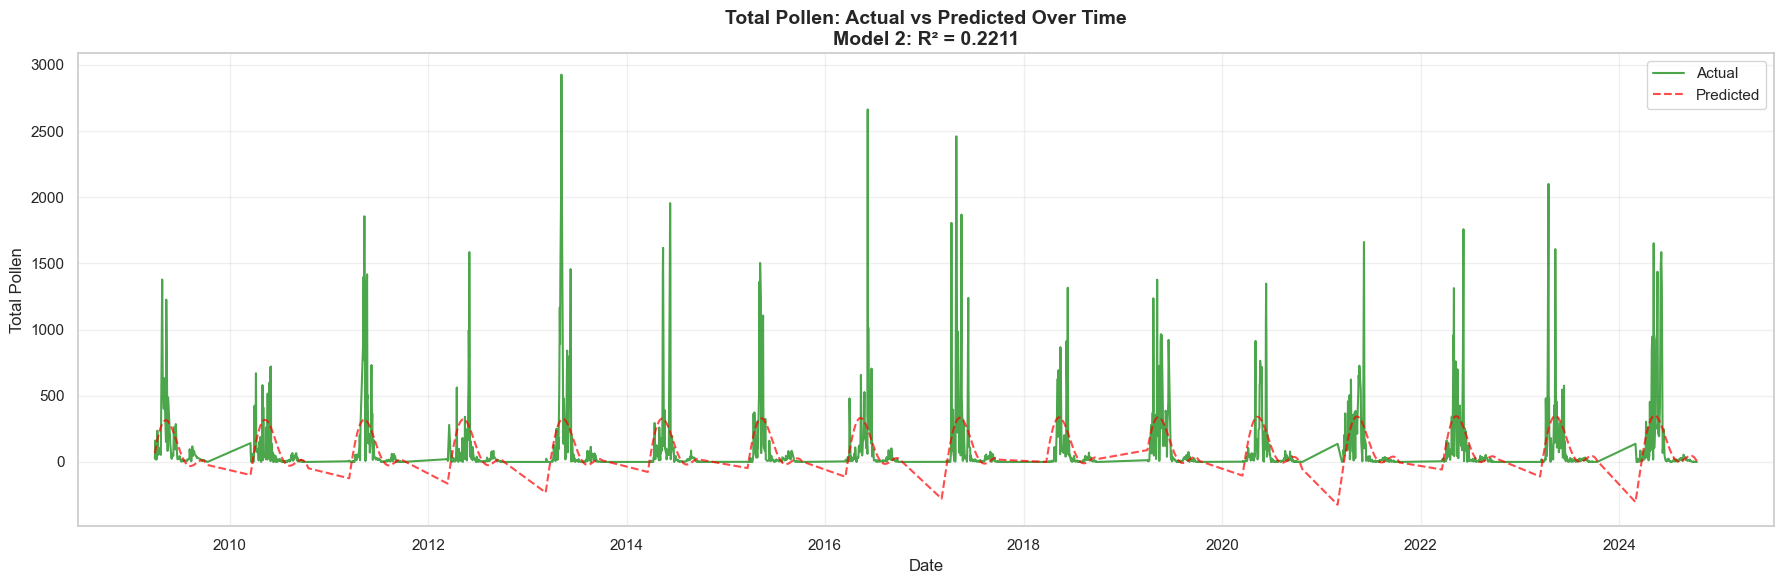

In [87]:
# 4.2 Model 1: AQI ~ Pollutants + Weather

# Define features for AQI prediction
pollutant_features = ['PM2.5', 'O3', 'CO', 'NO2', 'SO2']
weather_features = ['temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)']

aqi_features = pollutant_features + weather_features

# Remove rows with missing values in relevant columns
df_aqi_model = df_combined[['AQI'] + aqi_features].dropna()

X_aqi = df_aqi_model[aqi_features]
y_aqi = df_aqi_model['AQI']

# Fit model
model_aqi = LinearRegression()
model_aqi.fit(X_aqi, y_aqi)

# Predictions and metrics
y_aqi_pred = model_aqi.predict(X_aqi)
r2_aqi = r2_score(y_aqi, y_aqi_pred)
rmse_aqi = np.sqrt(mean_squared_error(y_aqi, y_aqi_pred))
mae_aqi = mean_absolute_error(y_aqi, y_aqi_pred)

# Create time-based features from the pollen data
df_pollen_time = df_pollen_renamed.copy()
df_pollen_time['day_of_year'] = df_pollen_time['date'].dt.dayofyear
df_pollen_time['month'] = df_pollen_time['date'].dt.month
df_pollen_time['week_of_year'] = df_pollen_time['date'].dt.isocalendar().week
df_pollen_time['year'] = df_pollen_time['date'].dt.year

# Create cyclical encoding for seasonality (sine and cosine)
df_pollen_time['day_sin'] = np.sin(2 * np.pi * df_pollen_time['day_of_year'] / 365.25)
df_pollen_time['day_cos'] = np.cos(2 * np.pi * df_pollen_time['day_of_year'] / 365.25)

# Add harmonic features to capture the sharp seasonal peaks
df_pollen_time['day_sin2'] = np.sin(4 * np.pi * df_pollen_time['day_of_year'] / 365.25)
df_pollen_time['day_cos2'] = np.cos(4 * np.pi * df_pollen_time['day_of_year'] / 365.25)

# Normalize year to help with regression
df_pollen_time['year_normalized'] = df_pollen_time['year'] - df_pollen_time['year'].min()

time_features = ['year_normalized', 'day_sin', 'day_cos', 'day_sin2', 'day_cos2']

# Remove rows with missing values
df_pollen_time_model = df_pollen_time[['Total_Pollen'] + time_features].dropna()

X_pollen_time = df_pollen_time_model[time_features]
y_pollen_time = df_pollen_time_model['Total_Pollen']

# Fit model
model_pollen_time = LinearRegression()
model_pollen_time.fit(X_pollen_time, y_pollen_time)

# Predictions and metrics
y_pollen_time_pred = model_pollen_time.predict(X_pollen_time)
r2_pollen_time = r2_score(y_pollen_time, y_pollen_time_pred)
rmse_pollen_time = np.sqrt(mean_squared_error(y_pollen_time, y_pollen_time_pred))
mae_pollen_time = mean_absolute_error(y_pollen_time, y_pollen_time_pred)

# Create time features for the combined dataset
df_combined_time = df_combined.copy()
df_combined_time['day_of_year'] = df_combined_time['date'].dt.dayofyear
df_combined_time['month'] = df_combined_time['date'].dt.month
df_combined_time['week_of_year'] = df_combined_time['date'].dt.isocalendar().week
df_combined_time['year'] = df_combined_time['date'].dt.year

# Create cyclical encoding
df_combined_time['day_sin'] = np.sin(2 * np.pi * df_combined_time['day_of_year'] / 365.25)
df_combined_time['day_cos'] = np.cos(2 * np.pi * df_combined_time['day_of_year'] / 365.25)
df_combined_time['day_sin2'] = np.sin(4 * np.pi * df_combined_time['day_of_year'] / 365.25)
df_combined_time['day_cos2'] = np.cos(4 * np.pi * df_combined_time['day_of_year'] / 365.25)

df_combined_time['year_normalized'] = df_combined_time['year'] - df_combined_time['year'].min()

time_weather_features = [
  'year_normalized', 'day_sin', 'day_cos', 'day_sin2', 'day_cos2',
  'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)'
]

# Remove rows with missing values
df_pollen_time_weather_model = df_combined_time[['Total_Pollen'] + time_weather_features].dropna()

X_pollen_time_weather = df_pollen_time_weather_model[time_weather_features]
y_pollen_time_weather = df_pollen_time_weather_model['Total_Pollen']

# Fit model
model_pollen_time_weather = LinearRegression()
model_pollen_time_weather.fit(X_pollen_time_weather, y_pollen_time_weather)

# Predictions and metrics
y_pollen_time_weather_pred = model_pollen_time_weather.predict(X_pollen_time_weather)
r2_pollen_time_weather = r2_score(y_pollen_time_weather, y_pollen_time_weather_pred)
rmse_pollen_time_weather = np.sqrt(mean_squared_error(y_pollen_time_weather, y_pollen_time_weather_pred))
mae_pollen_time_weather = mean_absolute_error(y_pollen_time_weather, y_pollen_time_weather_pred)

# 4.6 Visualization: Actual vs Predicted

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Model 1: AQI
axes[0].scatter(y_aqi, y_aqi_pred, alpha=0.5, s=20)
axes[0].plot([y_aqi.min(), y_aqi.max()], [y_aqi.min(), y_aqi.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual AQI', fontsize=11)
axes[0].set_ylabel('Predicted AQI', fontsize=11)
axes[0].set_title(f'Model 1: AQI Prediction\nR² = {r2_aqi:.4f}', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Model 2: Total Pollen (Time features)
axes[1].scatter(y_pollen_time, y_pollen_time_pred, alpha=0.5, s=20, color='green')
axes[1].plot([y_pollen_time.min(), y_pollen_time.max()], 
             [y_pollen_time.min(), y_pollen_time.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Total Pollen', fontsize=11)
axes[1].set_ylabel('Predicted Total Pollen', fontsize=11)
axes[1].set_title(f'Model 2: Pollen ~ Time Features\nR² = {r2_pollen_time:.4f}', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Model 3: Total Pollen (Time + Weather)
axes[2].scatter(y_pollen_time_weather, y_pollen_time_weather_pred, alpha=0.5, s=20, color='orange')
axes[2].plot([y_pollen_time_weather.min(), y_pollen_time_weather.max()], 
             [y_pollen_time_weather.min(), y_pollen_time_weather.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Total Pollen', fontsize=11)
axes[2].set_ylabel('Predicted Total Pollen', fontsize=11)
axes[2].set_title(f'Model 3: Pollen ~ Time + Weather\nR² = {r2_pollen_time_weather:.4f}', 
                  fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.7 Time Series Visualization: Actual vs Predicted Over Time

# Prepare data with predictions
df_pollen_viz = df_pollen_time_model.copy()
df_pollen_viz['predicted'] = y_pollen_time_pred
df_pollen_viz['date'] = df_pollen_time[df_pollen_time.index.isin(df_pollen_viz.index)]['date'].values

df_pollen_viz = df_pollen_viz.sort_values('date')

# Plot actual vs predicted over time
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

ax.plot(df_pollen_viz['date'], df_pollen_viz['Total_Pollen'], 
        color='green', linewidth=1.5, alpha=0.7, label='Actual')
ax.plot(df_pollen_viz['date'], df_pollen_viz['predicted'], 
        color='red', linewidth=1.5, alpha=0.7, label='Predicted', linestyle='--')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Pollen', fontsize=12)
ax.set_title(f'Total Pollen: Actual vs Predicted Over Time\nModel 2: R² = {r2_pollen_time:.4f}', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()